In [180]:
import numpy
from skimage import io
from skimage import draw

(3700, 2035) (395, 395)


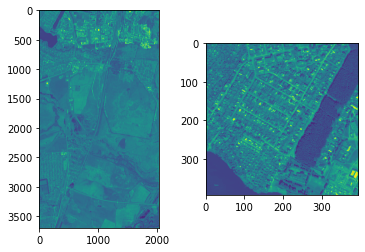

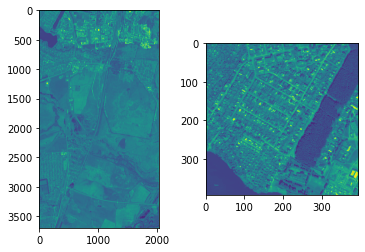

In [181]:
img_satellite = io.imread("img/Amap_pirogovo_50_85.png", as_gray=True)
img_sample = io.imread("img/sample_0.png", as_gray=True)
print(img_satellite.shape, img_sample.shape)
io.imshow_collection([img_satellite, img_sample])

In [182]:
#Среднеквадратическая ошибка
def mean_squared_error(image_a, image_b):
    err = numpy.sum((numpy.subtract(image_a, image_b)) ** 2)
    err /= float(image_a.shape[0] * image_b.shape[1])
    return err


#Вычисляет ошибку и рисует точку
def process_mse(src_img, target_img, dot_scale=50):
    result = mean_squared_error(src_img, target_img) * dot_scale
    row, col = draw.disk((src_img.shape[0] / 2, src_img.shape[1] / 2), result)
    copy = numpy.copy(src_img)
    copy[row, col] = 0
    return copy


#Объединяет исходное изображение и сэмпл с точкой
def merge_images(src_img, target_img, offset_x, offset_y):
    copy = numpy.copy(src_img)
    if copy.ndim == 0:
        return None
    for i in range(0, target_img.shape[0]):
        for j in range(0, target_img.shape[1]):
            if copy[j + offset_y][i + offset_x] != 0 and target_img[j][i] == 0:
                copy[j + offset_y][i + offset_x] = target_img[j][i]
    return copy


#Вырезает сэмпл с интервалом
def crop_image(src_image, offset_x, offset_y, step):
    if offset_y + step < src_image.shape[0] and offset_x + step < src_image.shape[1]:
        return numpy.copy(src_image[offset_y:offset_y + step, offset_x: offset_x + step])
    else:
        return None

In [183]:
_step = 40
_counter = -1
_max_sample = 5

_result_img = numpy.copy(img_satellite)


for _i in range(0, img_satellite.shape[0], _step):
    for _j in range(0, img_satellite.shape[1], _step):
        if _counter < _max_sample:
            crop = crop_image(img_satellite, _j, _i, img_sample.shape[0])
            if crop is not None:
                processed = process_mse(crop, img_sample, 150)
                _result_img = merge_images(_result_img, processed, _j, _i)
                if _counter > -1:
                    _counter += 1

io.imsave("img/result.jpg", _result_img)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
